<a href="https://colab.research.google.com/github/bearbearyu1223/Graph-Neural-Network-Study-Notes/blob/main/graph_neural_networks_with_pyg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Neural Networks with PyTorch Geometric

## 1. Applications of Graph Neural Networks(GNNs)

* **Node Classification** - predict the classes or labels of nodes (e.g., detect fraudulent entities in the network)
* **Link Prediction**- predict if there are possible linkages(edges)between nodes (e.g., friendship connection based on a scoial network)
* **Graph Classification** - predict the classes or labels of graphs (e.g., predict a chemcial compond is toxic or non-toxic by looking at its graph structure)
* **Community Detection** - partition nodes into clusters (e.g., predict communities in a social graph)
* **Anomaly Detection** - find outliner nodes in a graph. 








## 2. PyTorch Geometric (PyG)
PyTorch Geometric is an extension of PyTorch dedicated to GNNs. 

In [1]:
# Install PyTorch and PyTorch Geometric 
import torch
print("PyTorch Version: {}".format(torch.__version__))

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

PyTorch Version: 1.13.1+cu116
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
# Import other helpful libraries 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 

## 3. Graph Dataset - Zachary's karate club
[Zachary's karate club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) represents the relationships within a karate club studied by Wayne W. Zachary in the 1970s. It is a kind of social network, where every node is a member. The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club.

In this example, the club is divided into 4 groups, and we would like to assign the right group to every memeber by just looking at their connections (**node classification**).  

In [3]:
# Import the dataset and peek the dataset info 
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(dataset)
print("--------")
print("Number of Graphs: {}".format(len(dataset)))
print("Number of Features: {}".format(dataset.num_features))
print("Number of Classes: {}".format(dataset.num_classes))

KarateClub()
--------
Number of Graphs: 1
Number of Features: 34
Number of Classes: 4


In [4]:
# Dataset object can be seen as a collection of Data (graph)objects 
# Graph: Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
# x = [34, 34] is the node feature matrix with shape (number of nodes, number of features)
# edge_index = [2, 156] represents the graph connectivity with shape (2, number of directed edges)
# y = [34] is the node ground-truth labels
# train_mask = [34] is an optional attribute that tells which nodes should be used for training with a list of True or False statements
print("Graph: {}".format(dataset[0]))
data = dataset[0]
print("Node Feature Matrix x = {}".format(data.x.shape))
print(data.x)
print("Edge Index Matrix edge_index = {}".format(data.edge_index.shape))
print(data.edge_index)

Graph: Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Node Feature Matrix x = torch.Size([34, 34])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
Edge Index Matrix edge_index = torch.Size([2, 156])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31,

In [5]:
# Convert edge_index matrix to adjacency matrix A
from torch_geometric.utils import to_dense_adj

A = to_dense_adj(data.edge_index)[0].numpy().astype(int)
print("Adjacency Matrix A : {}".format(A.shape))
print(A)

Adjacency Matrix A : (34, 34)
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


In [6]:
# ground_truth labels 
print("Ground truth label y : {}".format(data.y.shape))
print(data.y)

Ground truth label y : torch.Size([34])
tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


In [7]:
# training mask matrix 
print("Training Mask train_mask : {}".format(data.train_mask.shape))
print(data.train_mask)

Training Mask train_mask : torch.Size([34])
tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])


In [8]:
# Check out other graph properties 
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


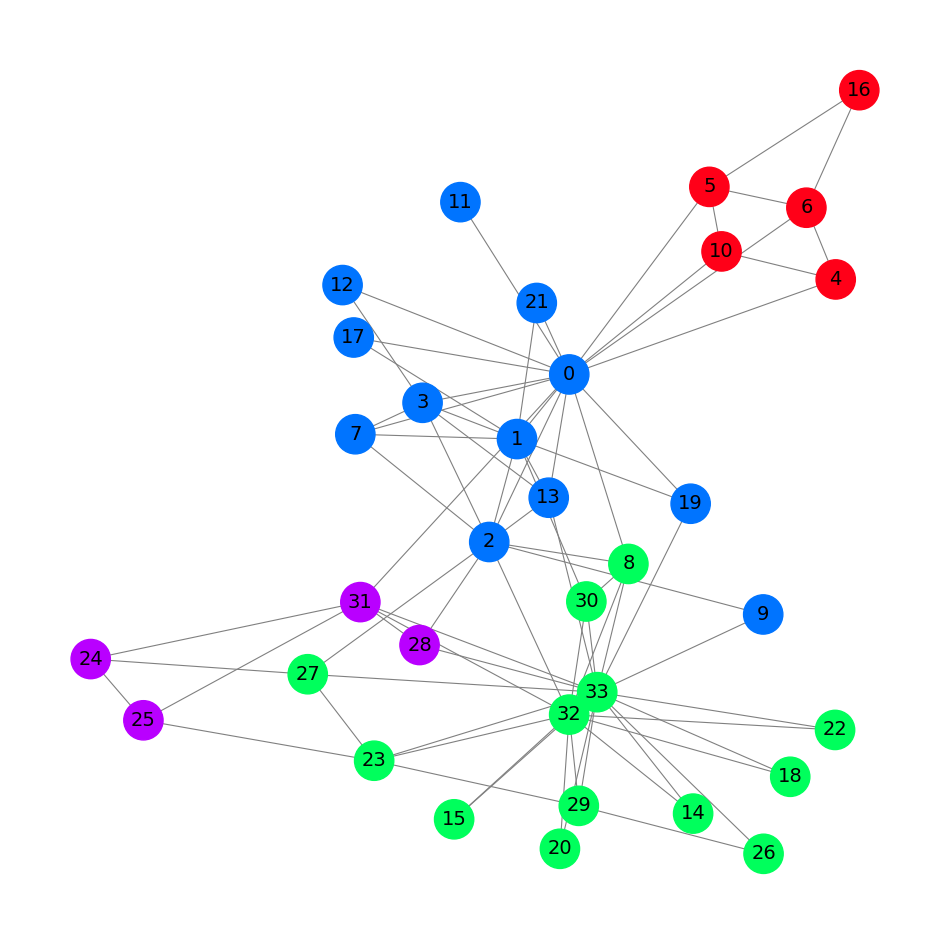

In [9]:
# Visualize the Graph
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12, 12))
plt.axis("off")
nx.draw_networkx(G, 
    pos = nx.spring_layout(G, seed=0), 
    with_labels = True, 
    node_size = 800, 
    node_color = data.y, 
    cmap = "hsv", 
    vmin = -2, 
    vmax = 3, 
    width = 0.8, 
    edge_color = "grey", 
    font_size = 14
)
plt.show()

## 4.Graph Convolutional Network (GCN)

The basic idea is to **enrich node representation by aggregating its features with those of its neighhors**. This operation is called **convolution**, or neighborhood aggregation. 



### 4.1 A Simple GCN Model
In the example below, we will create a simple GCN with only one GCN layer, a ReLU activation function, and one linear layer. 

In [10]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv
from torch_geometric.data import InMemoryDataset

class GCN(torch.nn.Module):
  def __init__(self, dataset, hidden_layer_dim):
    super().__init__()
    assert isinstance(dataset, InMemoryDataset)
    self.gcn = GCNConv(in_channels=dataset.num_features, out_channels=hidden_layer_dim)
    self.out = Linear(in_features=hidden_layer_dim, out_features=dataset.num_features)

  def forward(self, x, edge_index): 
    h = self.gcn(x, edge_index).relu()
    z = self.out(h)
    return h, z

model = GCN(dataset=dataset, hidden_layer_dim=3)
print(model)

GCN(
  (gcn): GCNConv(34, 3)
  (out): Linear(in_features=3, out_features=34, bias=True)
)


## 4.2 Training Loop
The trainning loop is very standard: predict the correct lables and compare the GCN's results to the values stored in `data.y`; the error is calculated by using the cross-entropy loss and backpropgagted with Adam optimizer to find-tune the model's weights and biases.  



In [11]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def accuracy(pred_y, y): 
  return (pred_y == y).sum()/len(y)

embeddings = [] 
losses = []
accuracies = []
outputs = [] 

for epoch in range(201):
  optimizer.zero_grad()
  h,z = model(data.x, data.edge_index)
  loss = criterion(z, data.y)
  acc = accuracy(z.argmax(dim=1), data.y)
  loss.backward()
  optimizer.step()
  embeddings.append(h)
  losses.append(loss)
  accuracies.append(acc)
  outputs.append(z.argmax(dim=1))

  if epoch % 10 == 0:
    print(f'Epoch {epoch:>3} | Loss {loss:.2f} | Acc: {acc*100:.2f}%')

Epoch   0 | Loss 3.58 | Acc: 0.00%
Epoch  10 | Loss 3.31 | Acc: 14.71%
Epoch  20 | Loss 2.93 | Acc: 14.71%
Epoch  30 | Loss 2.38 | Acc: 14.71%
Epoch  40 | Loss 1.78 | Acc: 38.24%
Epoch  50 | Loss 1.34 | Acc: 67.65%
Epoch  60 | Loss 1.12 | Acc: 64.71%
Epoch  70 | Loss 0.98 | Acc: 76.47%
Epoch  80 | Loss 0.87 | Acc: 82.35%
Epoch  90 | Loss 0.75 | Acc: 85.29%
Epoch 100 | Loss 0.63 | Acc: 85.29%
Epoch 110 | Loss 0.51 | Acc: 88.24%
Epoch 120 | Loss 0.41 | Acc: 88.24%
Epoch 130 | Loss 0.33 | Acc: 91.18%
Epoch 140 | Loss 0.26 | Acc: 97.06%
Epoch 150 | Loss 0.20 | Acc: 100.00%
Epoch 160 | Loss 0.16 | Acc: 100.00%
Epoch 170 | Loss 0.13 | Acc: 100.00%
Epoch 180 | Loss 0.11 | Acc: 100.00%
Epoch 190 | Loss 0.09 | Acc: 100.00%
Epoch 200 | Loss 0.08 | Acc: 100.00%


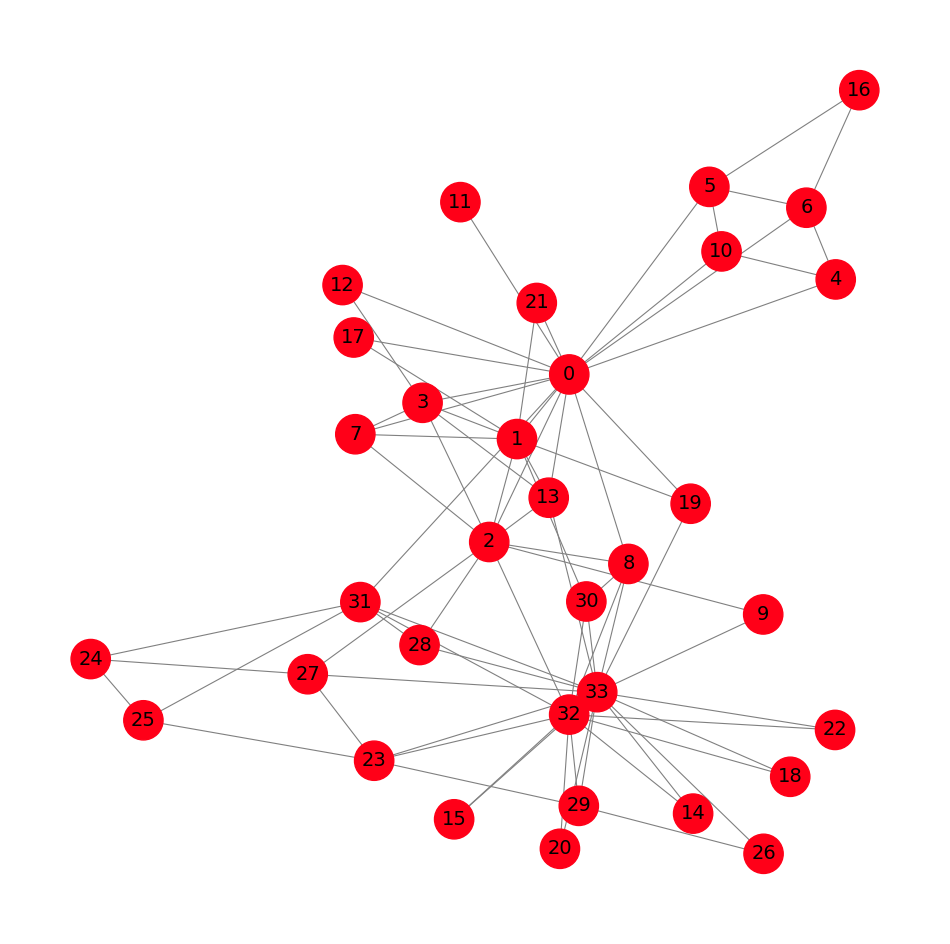

In [13]:
# plot the color of nodes at beginning of the training loop
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12, 12))
plt.axis("off")
nx.draw_networkx(G, 
    pos = nx.spring_layout(G, seed=0), 
    with_labels = True, 
    node_size = 800, 
    node_color = outputs[0], 
    cmap = "hsv", 
    vmin = -2, 
    vmax = 3, 
    width = 0.8, 
    edge_color = "grey", 
    font_size = 14
)
plt.show()

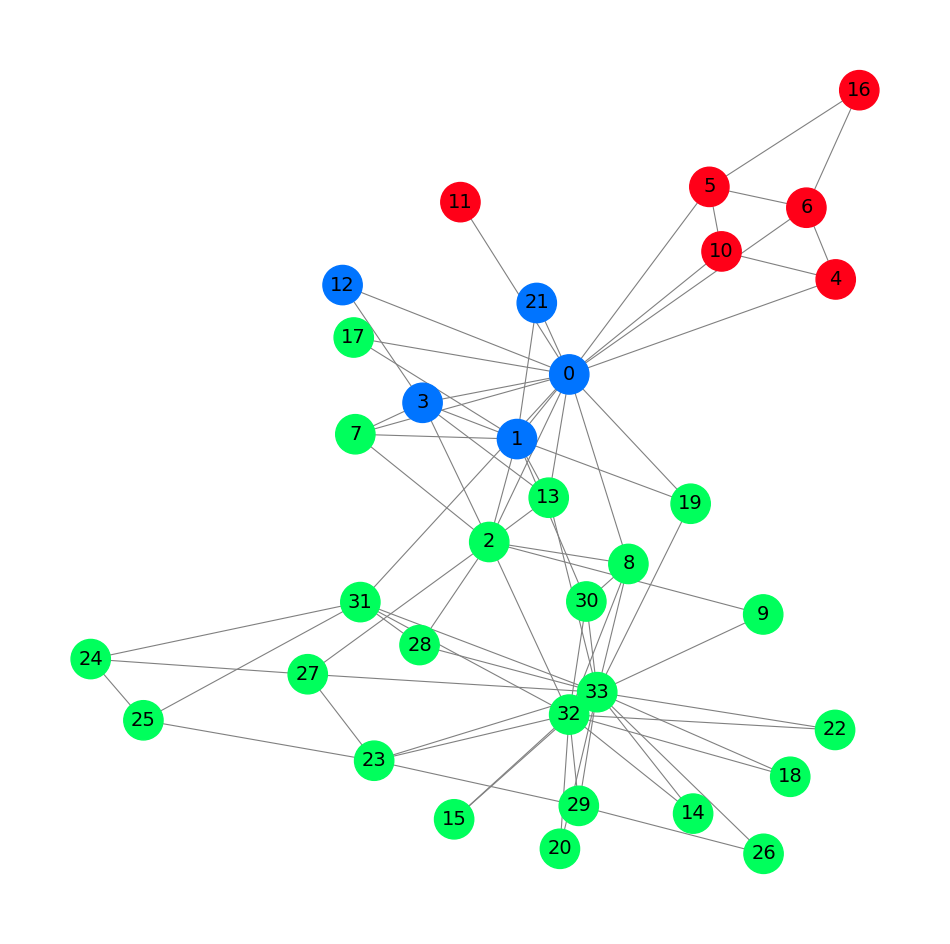

In [14]:
# plot the color of nodes during the trainning loop
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12, 12))
plt.axis("off")
nx.draw_networkx(G, 
    pos = nx.spring_layout(G, seed=0), 
    with_labels = True, 
    node_size = 800, 
    node_color = outputs[50], 
    cmap = "hsv", 
    vmin = -2, 
    vmax = 3, 
    width = 0.8, 
    edge_color = "grey", 
    font_size = 14
)
plt.show()

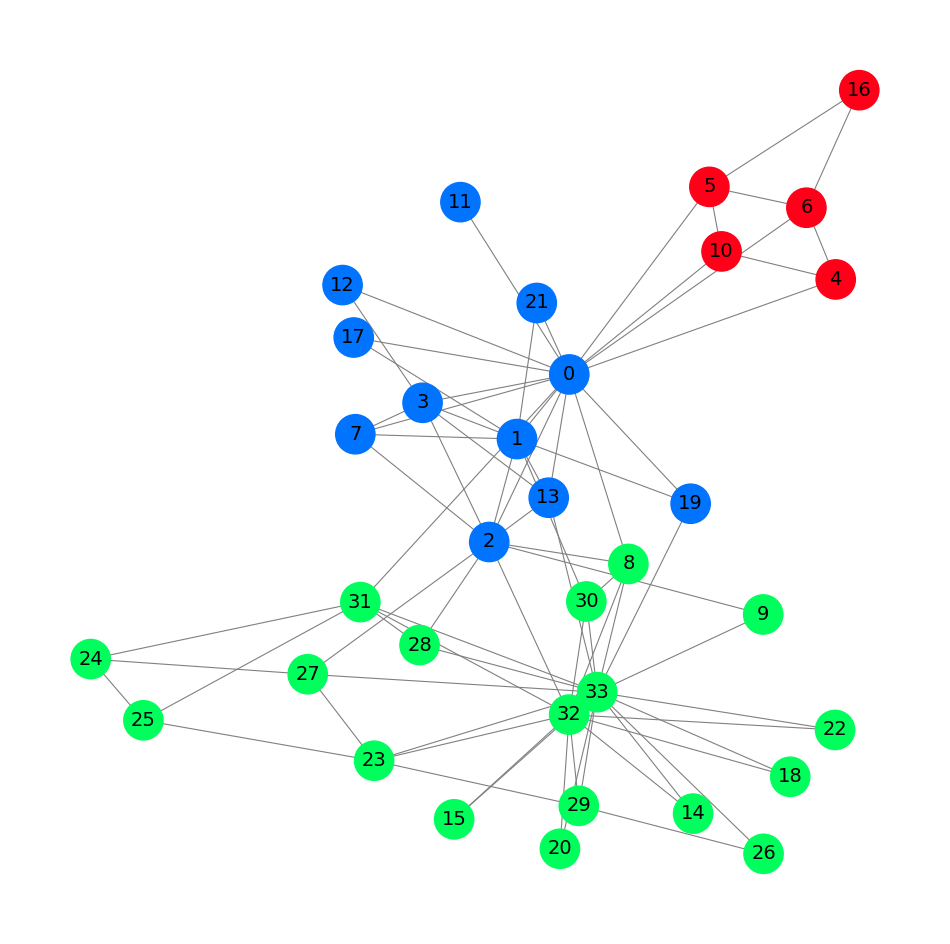

In [15]:
# plot the color of nodes during the trainning loop
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12, 12))
plt.axis("off")
nx.draw_networkx(G, 
    pos = nx.spring_layout(G, seed=0), 
    with_labels = True, 
    node_size = 800, 
    node_color = outputs[100], 
    cmap = "hsv", 
    vmin = -2, 
    vmax = 3, 
    width = 0.8, 
    edge_color = "grey", 
    font_size = 14
)
plt.show()

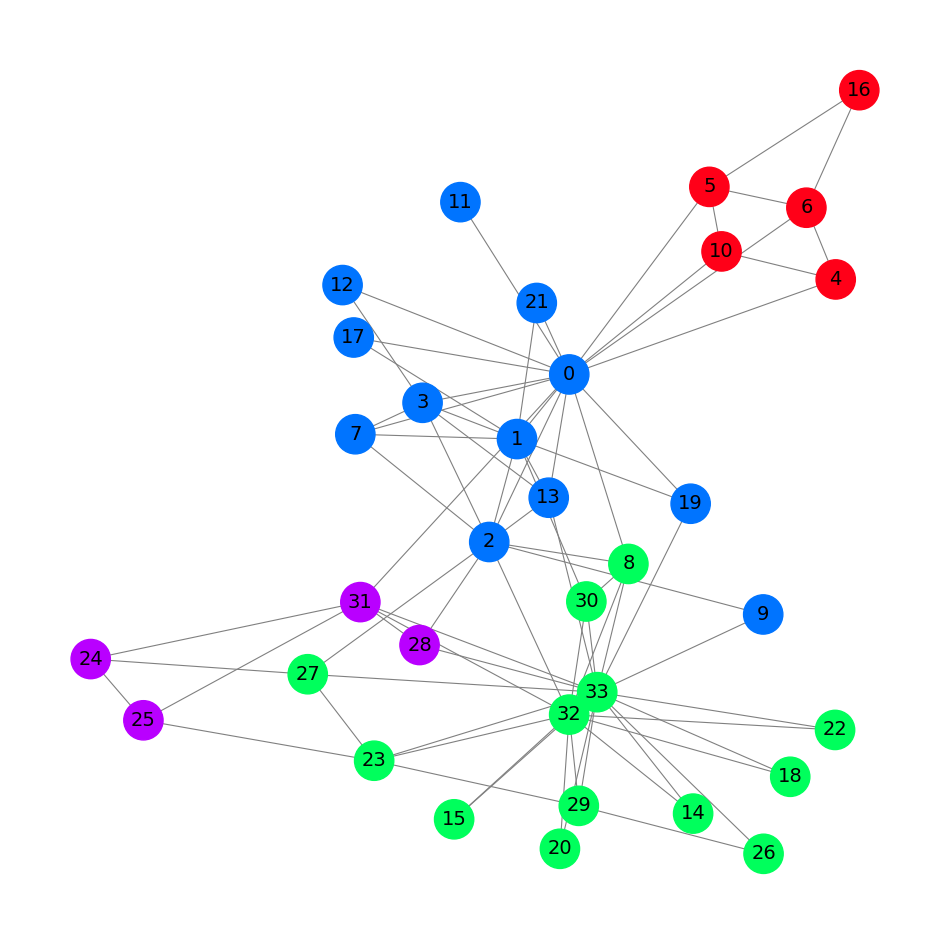

In [16]:
# plot the color of nodes at the end of the trainning loop
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12, 12))
plt.axis("off")
nx.draw_networkx(G, 
    pos = nx.spring_layout(G, seed=0), 
    with_labels = True, 
    node_size = 800, 
    node_color = outputs[200], 
    cmap = "hsv", 
    vmin = -2, 
    vmax = 3, 
    width = 0.8, 
    edge_color = "grey", 
    font_size = 14
)
plt.show()